In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22654


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22649,2021-05-07,47,沖縄県,82,12899,1,138
22650,2021-05-08,47,沖縄県,93,12992,0,138
22651,2021-05-09,47,沖縄県,103,13095,0,138
22652,2021-05-10,47,沖縄県,36,13131,1,139
22653,2021-05-11,47,沖縄県,132,13263,0,139


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10604,6956,129
43,香川県,17834,1628,23
44,高知県,18798,1126,20
45,鳥取県,14942,405,2
46,鹿児島県,22172,2649,28


## 都道府県ごとの最新データを付与

In [4]:
# 直近１週間の感染者数
pref["直近1週間の感染者数"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).sum()
pref.tail(7)

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,直近1週間の感染者数
22647,2021-05-05,47,沖縄県,63,12778,0,137,450.0
22648,2021-05-06,47,沖縄県,39,12817,0,137,413.0
22649,2021-05-07,47,沖縄県,82,12899,1,138,436.0
22650,2021-05-08,47,沖縄県,93,12992,0,138,424.0
22651,2021-05-09,47,沖縄県,103,13095,0,138,470.0
22652,2021-05-10,47,沖縄県,36,13131,1,139,449.0
22653,2021-05-11,47,沖縄県,132,13263,0,139,548.0


In [5]:
latest = pref.loc[pref["日付"]==pref["日付"].max()][["都道府県名","直近1週間の感染者数"]]
latest.head()

,都道府県名,直近1週間の感染者数
481,北海道,2488.0
963,青森県,198.0
1445,岩手県,120.0
1927,宮城県,219.0
2409,秋田県,103.0


In [6]:
all_jp = pd.merge(all_jp, latest, on="都道府県名")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数
0,三重県,11568,4216,93,286.0
1,京都府,12532,13929,194,860.0
2,佐賀県,19762,2041,15,339.0
3,兵庫県,13496,35929,811,2681.0
4,北海道,482,27511,906,2488.0


## 人口データを付与

In [7]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [8]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口
0,三重県,11568,4216,93,286.0,1813859
1,京都府,12532,13929,194,860.0,2545899
2,佐賀県,19762,2041,15,339.0,823810
3,兵庫県,13496,35929,811,2681.0,5549568
4,北海道,482,27511,906,2488.0,5267762


## 人口当たりの感染者数

In [9]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp["直近1週間の10万人当たりの感染者数"] = all_jp["直近1週間の感染者数"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
4,北海道,482,27511,906,2488.0,5267762,52.225214,522.252144,47.230684
41,青森県,964,1838,26,198.0,1275783,14.406839,144.068388,15.519881
19,岩手県,1446,1122,36,120.0,1235517,9.081219,90.812186,9.712533
11,宮城県,1928,8386,74,219.0,2292385,36.581988,365.819878,9.553369
36,秋田県,2410,620,9,103.0,985416,6.291759,62.917590,10.452438
15,山形県,2892,1622,36,72.0,1082296,14.986658,149.866580,6.652524
35,福島県,3374,3968,129,412.0,1881981,21.084166,210.841661,21.891826
38,茨城県,3856,8680,135,332.0,2921436,29.711416,297.114159,11.364274
27,栃木県,4338,5650,74,210.0,1965516,28.745632,287.456322,10.684217
37,群馬県,4820,6842,109,544.0,1969439,34.740858,347.408577,27.622079


## 感染者数

### 平均値、中央値

In [10]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      13828.212766
std       26571.118812
min         385.000000
25%        1939.500000
50%        4154.000000
75%        8533.000000
max      148092.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [11]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
0,東京都,6266,148092,1923,5770.0,13834925,107.042142,1070.421415,41.706045
1,大阪府,13014,91184,1785,5955.0,8849635,103.037018,1030.370179,67.290911
2,神奈川県,6748,56252,842,1760.0,9209442,61.080791,610.807908,19.110821
3,埼玉県,5302,40286,754,1579.0,7390054,54.513810,545.138100,21.366556
4,愛知県,11086,37754,657,3006.0,7575530,49.836777,498.367771,39.680392
5,兵庫県,13496,35929,811,2681.0,5549568,64.741976,647.419763,48.310067
6,千葉県,5784,34676,648,934.0,6319772,54.869068,548.690681,14.779014
7,福岡県,19280,27608,374,2891.0,5129841,53.818432,538.184322,56.356523
8,北海道,482,27511,906,2488.0,5267762,52.225214,522.252144,47.230684
9,京都府,12532,13929,194,860.0,2545899,54.711518,547.115184,33.779816


## １万人あたりの感染者数

### 平均値、中央値

In [12]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      32.127537
std       23.744314
min        5.667399
25%       16.273081
50%       24.775130
75%       43.209382
max      107.042142
Name: １万人当たりの感染者数, dtype: float64

## 直近１週間の１０万人あたりの感染者数

In [13]:
all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,直近1週間の感染者数,人口,１万人当たりの感染者数,10万人当たりの感染者数,直近1週間の10万人当たりの感染者数
9,大阪府,13014,91184,1785,5955.0,8849635,103.037018,1030.370179,67.290911
34,福岡県,19280,27608,374,2891.0,5129841,53.818432,538.184322,56.356523
18,岡山県,15906,5257,62,944.0,1903627,27.615704,276.157041,49.589547
3,兵庫県,13496,35929,811,2681.0,5549568,64.741976,647.419763,48.310067
4,北海道,482,27511,906,2488.0,5267762,52.225214,522.252144,47.230684
26,東京都,6266,148092,1923,5770.0,13834925,107.042142,1070.421415,41.706045
8,大分県,21208,2525,30,478.0,1151229,21.933082,219.330819,41.520844
10,奈良県,13978,6951,91,560.0,1353837,51.342961,513.429608,41.363916
2,佐賀県,19762,2041,15,339.0,823810,24.775130,247.751302,41.150265
24,愛知県,11086,37754,657,3006.0,7575530,49.836777,498.367771,39.680392


## グラフ化

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [15]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["直近1週間の10万人当たりの感染者数"],ascending=False)

<IPython.core.display.Javascript object>


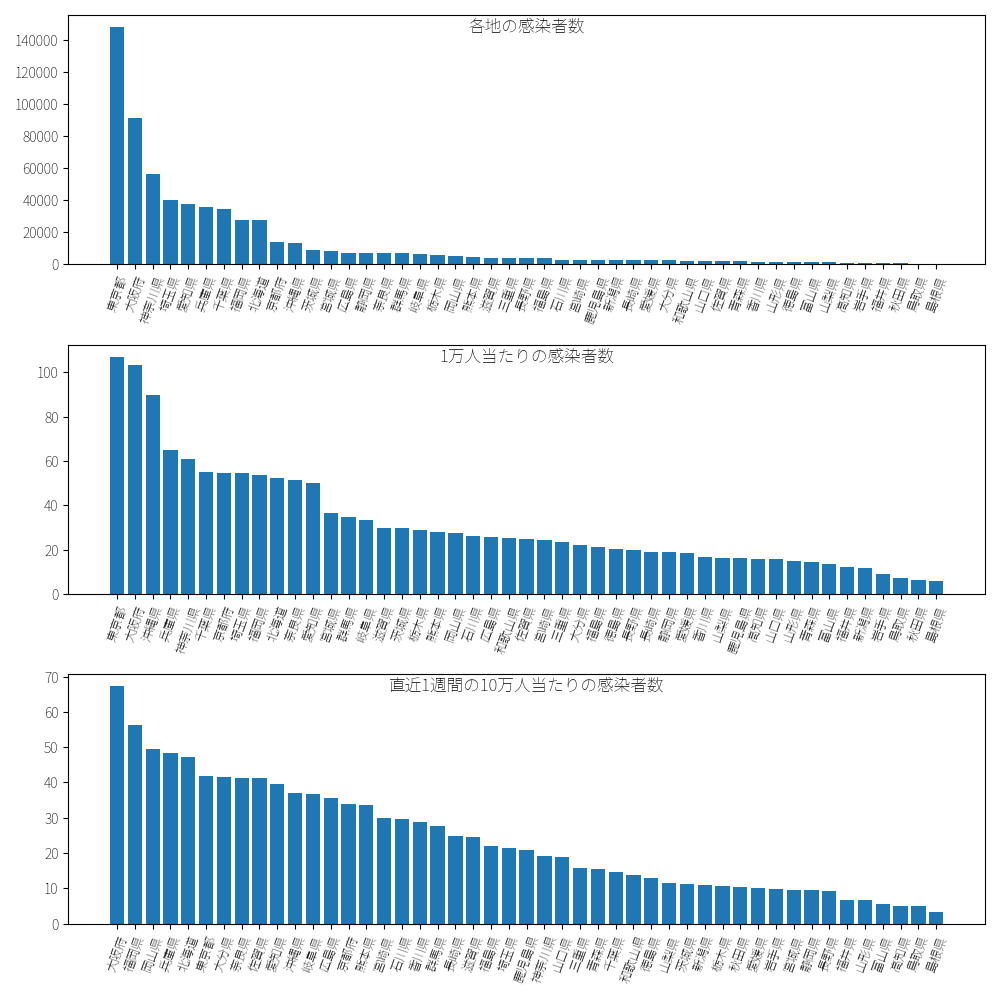

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(3,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


plt.subplot(3,1,3) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_100k["都道府県名"], all_jp_desc_100k["直近1週間の10万人当たりの感染者数"])
plt.title("直近1週間の10万人当たりの感染者数",y=0.9)

fig.tight_layout()


## 度数分布表

In [17]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  4  2  1  1  0  0  1]
[   385.     18848.375  37311.75   55775.125  74238.5    92701.875
 111165.25  129628.625 148092.   ]


## ヒストグラム

<IPython.core.display.Javascript object>


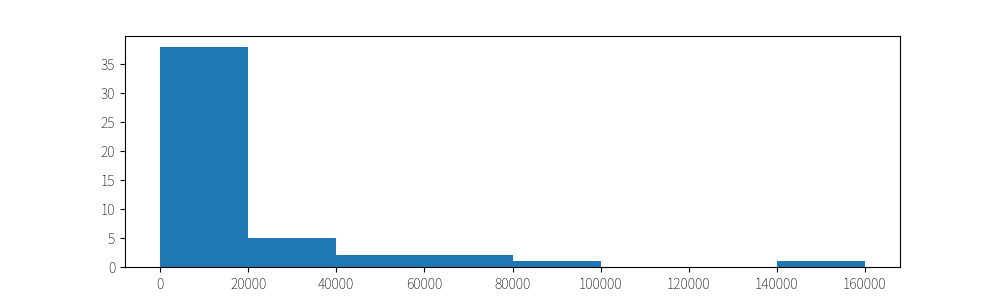

(array([38.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [22]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


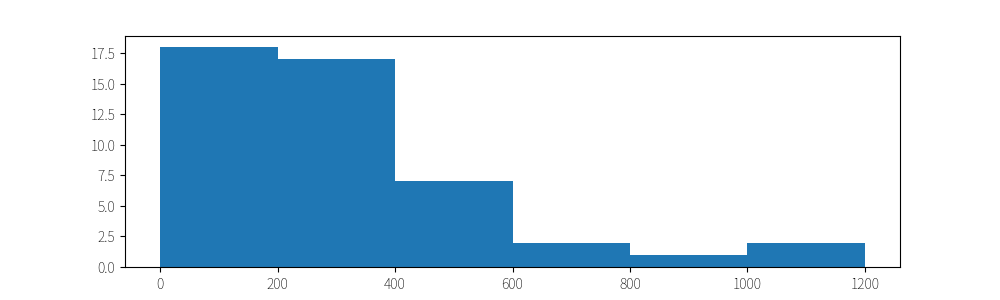

(array([18., 17.,  7.,  2.,  1.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200]),
 <a list of 6 Patch objects>)

In [19]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["10万人当たりの感染者数"],bins=[0,200,400,600,800,1000,1200])
